<a href="https://colab.research.google.com/github/Sergeichik/MLDM-2023/blob/main/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

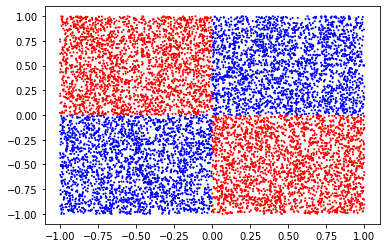

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

**FINALLY, I'VE FINISHED THIS TASK**

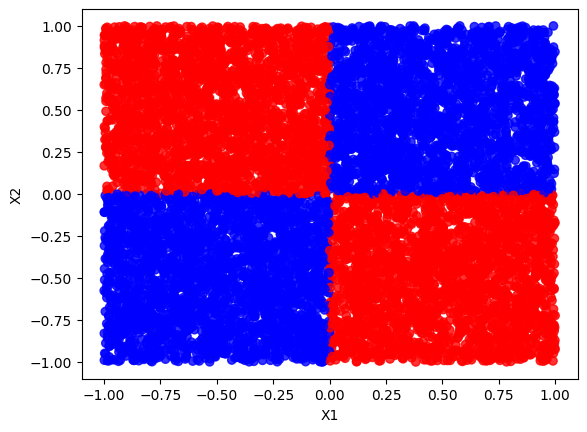

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(low=-1,high=1,size=(10000, 2))
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))

1.0


In [3]:
def plot_decision_surface(
                  clf, X, y,
                  nx=200, ny=100,
                  cmap='bwr',
                  alpha=0.6,
        ):
    """
    Plot the decision boundary of clf on X and y, visualize training points
    """

    # Define the grid
    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.linspace(x_top_left[0], x_bottom_right[0], ny),
         np.linspace(x_top_left[1], x_bottom_right[1], nx)
      )

    # Calculate predictions on the grid
    y_pred_grid = clf.predict(
                        np.stack(
                              [
                                grid_x0.ravel(),
                                grid_x1.ravel()
                              ],
                              axis=1
                            )
                      ).reshape(grid_x1.shape)

    # Find optimal contour levels and make a filled
    # contour plot of predictions
    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1],
                             labels,
                             [labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2
    plt.contourf(grid_x0, grid_x1, y_pred_grid, cmap=cmap, alpha=alpha,
                 levels=medians)

    # Scatter data points on top of the plot,
    # with different styles for correct and wrong
    # predictions
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='o', cmap=cmap, s=1, label='correct')
    plt.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=1, label='errors')

    # Dummy plot call to print the accuracy in the legend.
    plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))

    plt.legend(loc='best')

1


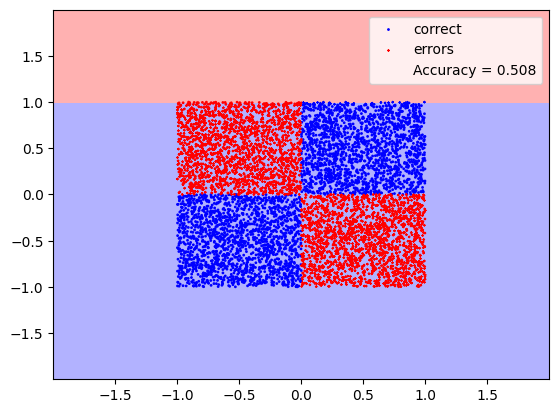

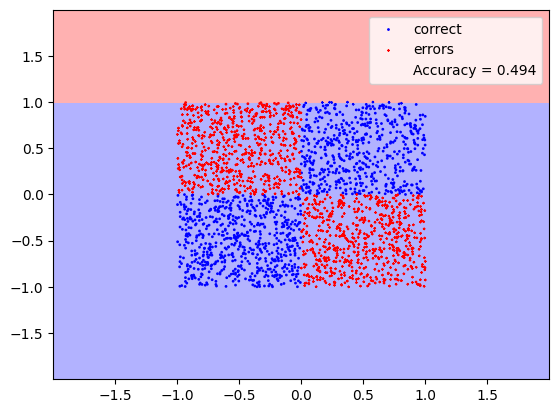

2


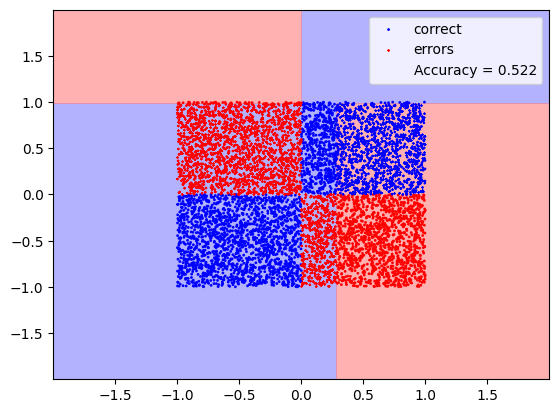

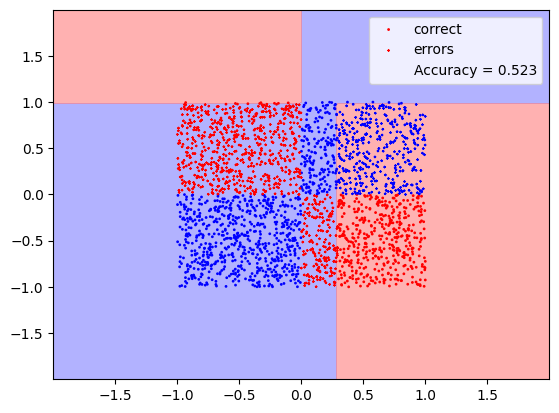

3


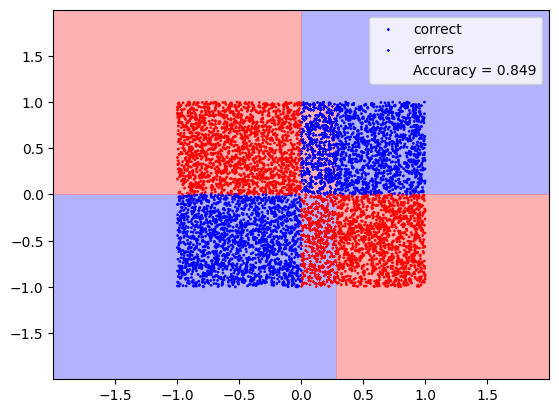

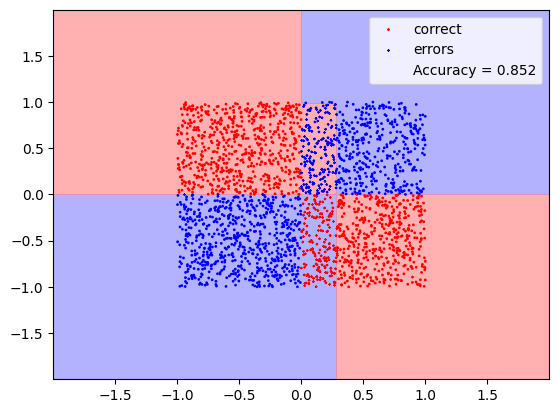

4


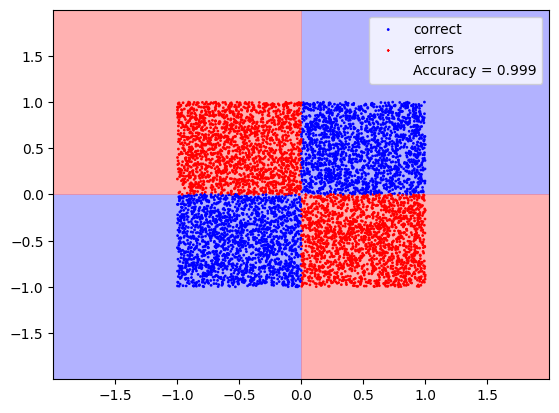

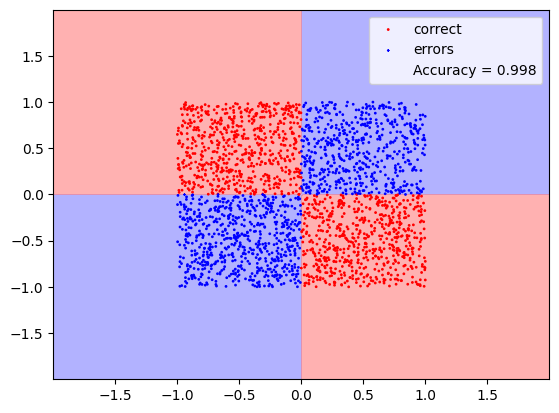

In [4]:
depth_values = [1, 2, 3, 4]

for d_val in depth_values:
  mCLF = DecisionTreeClassifier(max_depth=d_val)
  mCLF.fit(X_train, y_train)
  # plt.subplot(1, 2, i + 1)
  print(d_val)
  plot_decision_surface(mCLF, X_train, y_train)
  plt.show()
  plot_decision_surface(mCLF, X_test, y_test)
  plt.show()

# Task 2 (3 points)

Consider the following dataset:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
clf = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
clf.fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8770247229326513

In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param = {
    "max_depth": [i for i in range(1, 11, 1)],

    "ccp_alpha": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 10],

    "max_leaf_nodes": [i for i in range(2, 20, 1)],

}
bst = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
search = GridSearchCV(bst, param, scoring='roc_auc', cv=5)
search.fit(X_train, y_train)
max_depth_best = search.best_params_.values().mapping['max_depth']
ccp_alpha_best = search.best_params_.values().mapping['ccp_alpha']
max_leaf_nodes_best = search.best_params_.values().mapping['max_leaf_nodes']
model = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.}, max_depth=max_depth_best, ccp_alpha=ccp_alpha_best, max_leaf_nodes=max_leaf_nodes_best)
model.fit(X_train, y_train)
y_score = roc_auc_score(y_test, model.predict_proba(X_test)[::, 1])
print(y_score)

0.9279624893435636


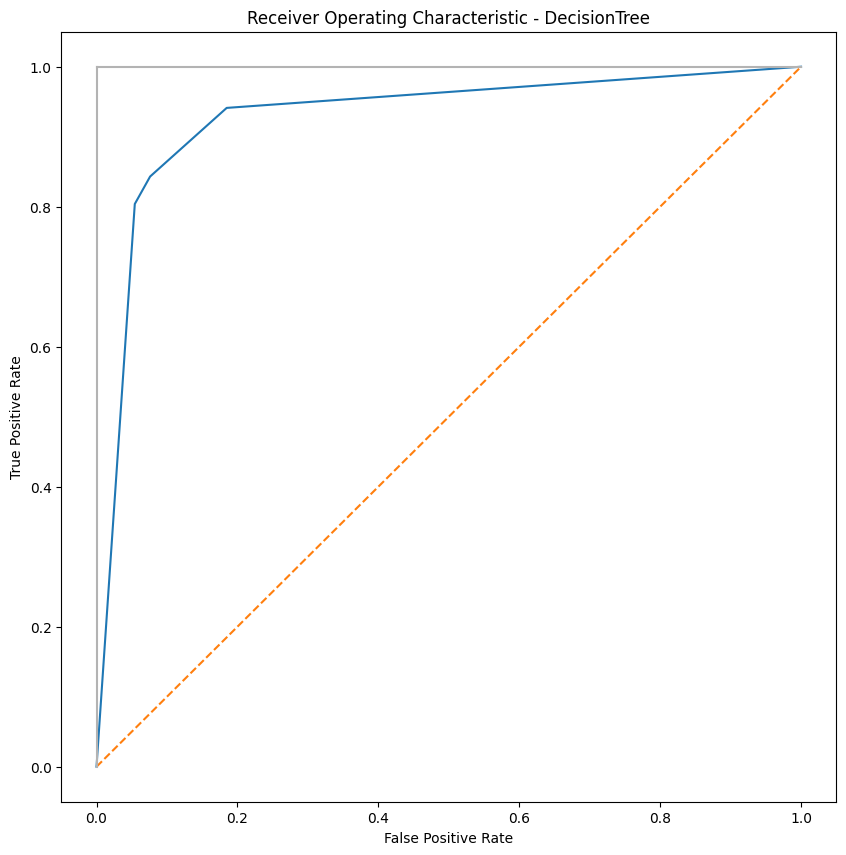

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label='malignant')

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##And now...##
Your should implement "fit" method in our tree class.
It have to set the corresponding self.rule methods to all nodes.
self.rule should divide your data into 2 different branches and return corresponding indices.

Metrics and learning algorothms are up to you. Try to use
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html    to find the optimal thresholds.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

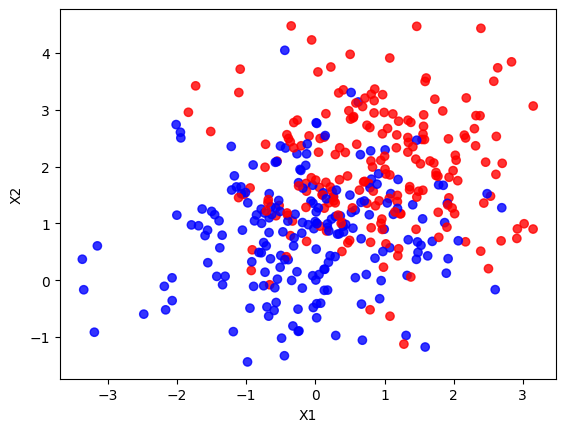

In [29]:
from sklearn.datasets import make_blobs

X_toy, y_toy = make_blobs(n_samples=400,
                          centers=[[0., 1.], [1., 2.]],
                          random_state=14)

plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

X_toy_train, X_toy_test, y_toy_train, y_toy_test = \
    train_test_split(X_toy, y_toy, test_size=0.25)

In [35]:
from scipy.optimize import minimize_scalar
max_tree_depth = 2

class Tree:
    def __init__(self, data=None, left=None, right=None, prediction=0, level=0, criterion='gini'):
        self.data = data
        self.left  = left
        self.right = right
        self.rule= lambda x: print("Try to run fit first")
        self.prediction = prediction
        self.level = level
        self.criterion = criterion
        self.samples = 0

    def __str__(self):
        return str(self.data)

    def is_leaf(self):
        if self.left is None and self.right is None:
            return True
        return False

    def predict(self, some_data, indices=None, predictions=None):

        predictions = np.full((some_data.shape[0]), 2) if predictions is None else predictions
        indices = np.arange(some_data.shape[0]) if indices is None else indices
        if self.is_leaf():
            if len(indices) > 0:
                predictions[indices] = self.prediction

        else:
            left_inds, right_inds = self.rule(some_data, indices)
            self.left.predict(some_data, indices=left_inds, predictions=predictions)
            self.right.predict(some_data, indices=right_inds, predictions=predictions)
        if self.level==0:
            return predictions

    def fit(self, X, y):
        #/*YOR CODE HERE*/#

        if self.level>=max_tree_depth:
            return self
        if self.level == 0:
            self.samples = len(y)

        self.left = Tree(level=self.level+1, prediction=0)
        self.right = Tree(level=self.level+1, prediction=1)

        def calculate_impurity(y, criterion=self.criterion):
            classes_counts = np.unique(y, return_counts=True)[1]
            probs = classes_counts / classes_counts.sum()

            if criterion == 'entropy':
                return - np.sum(probs * np.log(probs))
            if criterion == 'gini':
                return 1 - np.sum(np.square(probs))
            raise ValueError('Not supported criterion! Use only Gini or Entropy')

        def objective_function(threshold, feature_index, X, y):
            left_indices = X[:, feature_index] < threshold
            right_indices = X[:, feature_index] >= threshold

            left_impurity = calculate_impurity(y[left_indices])
            right_impurity = calculate_impurity(y[right_indices])

            weighted_impurity = (left_impurity * len(y[left_indices]) + right_impurity * len(y[right_indices])) / len(y)
            return weighted_impurity

        best_threshold = None
        best_feature = None
        best_impurity = float('inf')

        for feature_index in range(X.shape[1]):
            result = minimize_scalar(objective_function, args=(feature_index, X, y))
            threshold = result.x
            impurity = result.fun

            if impurity < best_impurity:
                best_impurity = impurity
                best_feature = feature_index
                best_threshold = threshold

        if best_feature is not None:
            self.feature_index = best_feature
            self.threshold = best_threshold
            self.impurity = best_impurity


            left_indices = X[:, best_feature] < best_threshold
            right_indices = X[:, best_feature] >= best_threshold

            self.rule = lambda x, indices: (indices[x[indices][:, self.feature_index] < self.threshold], indices[~(x[indices][:, self.feature_index] < self.threshold)])

            self.left.fit(X[left_indices], y[left_indices])
            self.right.fit(X[right_indices], y[right_indices])

            self.left.samples = len(y[left_indices])
            self.right.samples = len(y[right_indices])

        return self

In [34]:
tree = Tree()
tree.fit(X_toy_train, y_toy_train)
my_preds = tree.predict(X_toy_test)
print(accuracy_score(y_toy_test, my_preds))

0.7
